In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, quantile
from numpy.random import randint, permutation

plt.rcParams['font.size'] = 14

# Scalar Quantiles via Optimal Transport

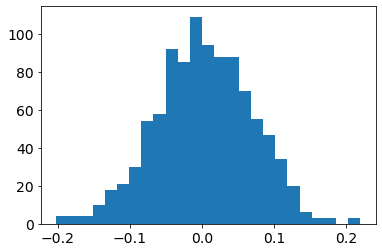

In [2]:
from vqr.data import generate_mvn_data

d = 1
k = 1
T = 50
N = 1000

_, Y = generate_mvn_data(N, d, k)

plt.hist(Y, 25);

In [3]:
from vqr import VectorQuantileEstimator

vq1 = VectorQuantileEstimator(n_levels=T, solver_opts={'verbose': True})
vq1.fit(Y)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Feb 09 11:54:28 AM: Your problem has 50000 variables, 3 constraints, and 0 parameters.
(CVXPY) Feb 09 11:54:28 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 09 11:54:28 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 09 11:54:28 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 09 11:54:28 AM: Compiling problem (target solver=ECOS).
(CVXPY) Feb 09 11:54:28 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> C

VectorQuantileEstimator(solver=<vqr.vqr.CVXVQRSolver object at 0x129749070>,
                        solver_opts={'verbose': True})

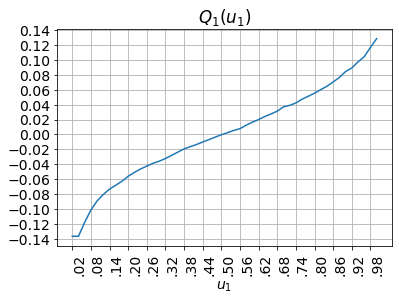

In [4]:
fig = vq1.plot_quantiles()
fig.savefig("figs/qr_1d.png", dpi=150, bbox_inches="tight")

# 2D Vector Quantiles

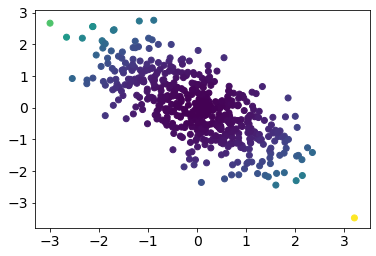

In [5]:
from vqr.data import generate_mvn_data

d = 2
k = 1
T = 25
N = 500

_, Y = generate_mvn_data(N, d, k)
plt.scatter(Y[:, 0], Y[:, 1], c=np.sum(Y**2, axis=1))

In [6]:
vq2 = VectorQuantileEstimator(n_levels=T, solver_opts={'verbose': True})
vq2.fit(Y)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Feb 09 11:54:30 AM: Your problem has 312500 variables, 3 constraints, and 0 parameters.
(CVXPY) Feb 09 11:54:30 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 09 11:54:30 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 09 11:54:30 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 09 11:54:30 AM: Compiling problem (target solver=ECOS).
(CVXPY) Feb 09 11:54:30 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> 

VectorQuantileEstimator(n_levels=25,
                        solver=<vqr.vqr.CVXVQRSolver object at 0x1299e2160>,
                        solver_opts={'verbose': True})

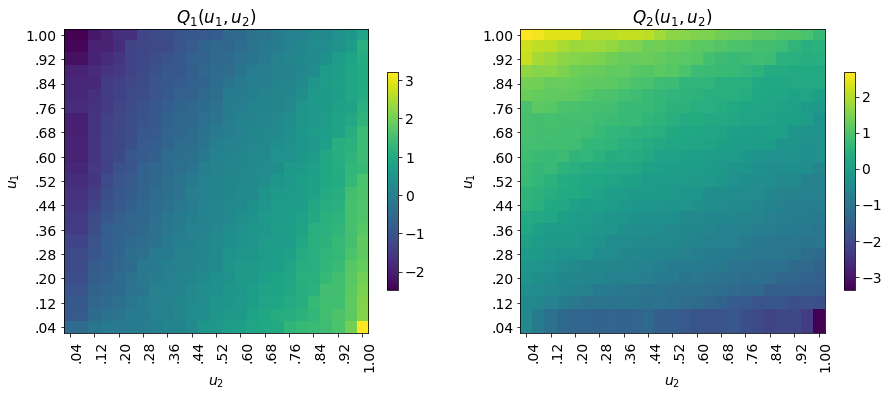

In [7]:
fig = vq2.plot_quantiles(figsize=(15, 20))

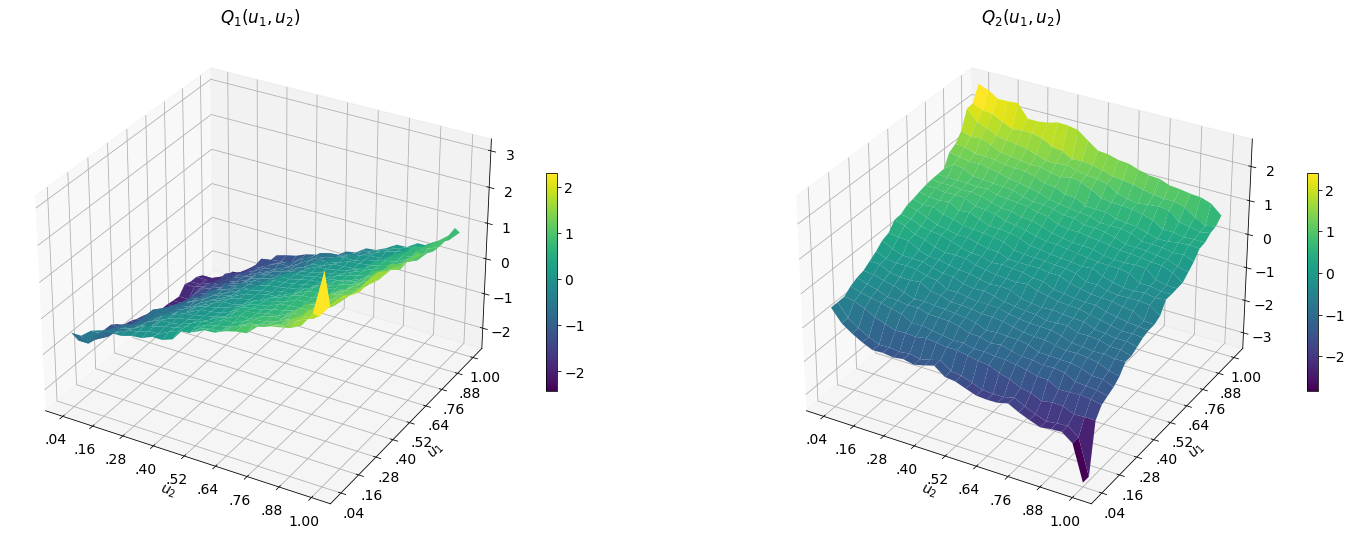

In [8]:
fig = vq2.plot_quantiles(figsize=(25, 20), surf_2d=True)
fig.savefig("figs/qr_2d.png", dpi=150, bbox_inches="tight")

# 3D Vector Quantiles

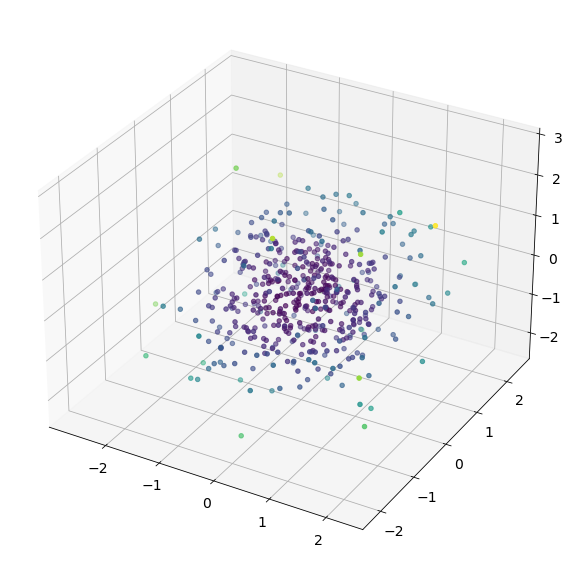

In [9]:
from vqr.data import generate_mvn_data

d = 3
k = 1
T = 10
N = 500

_, Y = generate_mvn_data(N, d, k)

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(10, 20))
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=np.sum(Y**2, axis=1))

In [10]:
vq3 = VectorQuantileEstimator(n_levels=T, solver_opts={'verbose': True})
vq3.fit(Y)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Feb 09 11:54:44 AM: Your problem has 500000 variables, 3 constraints, and 0 parameters.
(CVXPY) Feb 09 11:54:44 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 09 11:54:44 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 09 11:54:44 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 09 11:54:44 AM: Compiling problem (target solver=ECOS).
(CVXPY) Feb 09 11:54:44 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> 

VectorQuantileEstimator(n_levels=10,
                        solver=<vqr.vqr.CVXVQRSolver object at 0x129a050a0>,
                        solver_opts={'verbose': True})

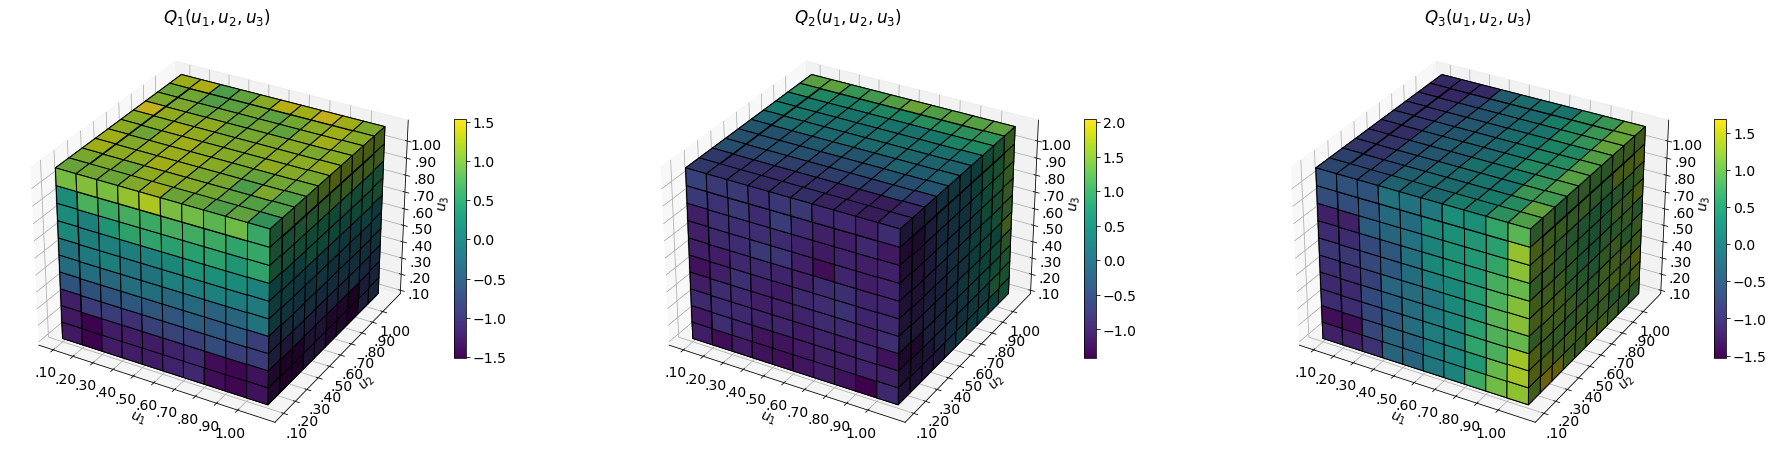

In [11]:
fig = vq3.plot_quantiles(figsize=(32, 22))
fig.savefig("figs/qr_3d.png", dpi=150, bbox_inches="tight")